In [ ]:
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 1
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [ ]:
# 2, 3
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# 4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape[1]

10

In [ ]:
# 5
W = np.random.rand(10)
b = np.random.rand()

In [ ]:
# 5
def model(X, W, b):
    y_pred = 0
    for i in range(10):
        y_pred += X[:, i] * W[i]
    y_pred += b
    return y_pred

In [ ]:
# 6
def MSE(pred, real):
    mse = ((pred - real) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    y_pred = model(X, W, b)
    L = MSE(y_pred, y)
    return L

In [ ]:
# 7
def gradient(X, W, b, y):
    N = len(y)

    y_pred = model(X, W, b)

    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

In [ ]:
# 8
lr = 0.2

In [ ]:
# 9
losses = []

for i in range(1, 2001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= lr * dW
    b -= lr * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 5907.4433
Iteration 20 : Loss 5761.6190
Iteration 30 : Loss 5625.4797
Iteration 40 : Loss 5497.5825
Iteration 50 : Loss 5377.3788
Iteration 60 : Loss 5264.3577
Iteration 70 : Loss 5158.0433
Iteration 80 : Loss 5057.9923
Iteration 90 : Loss 4963.7918
Iteration 100 : Loss 4875.0572
Iteration 110 : Loss 4791.4302
Iteration 120 : Loss 4712.5769
Iteration 130 : Loss 4638.1863
Iteration 140 : Loss 4567.9685
Iteration 150 : Loss 4501.6535
Iteration 160 : Loss 4438.9896
Iteration 170 : Loss 4379.7420
Iteration 180 : Loss 4323.6923
Iteration 190 : Loss 4270.6364
Iteration 200 : Loss 4220.3843
Iteration 210 : Loss 4172.7589
Iteration 220 : Loss 4127.5949
Iteration 230 : Loss 4084.7381
Iteration 240 : Loss 4044.0449
Iteration 250 : Loss 4005.3811
Iteration 260 : Loss 3968.6216
Iteration 270 : Loss 3933.6498
Iteration 280 : Loss 3900.3567
Iteration 290 : Loss 3868.6406
Iteration 300 : Loss 3838.4067
Iteration 310 : Loss 3809.5662
Iteration 320 : Loss 3782.0366
Iteration 330 : L

In [ ]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

np.float64(2864.6630171384004)

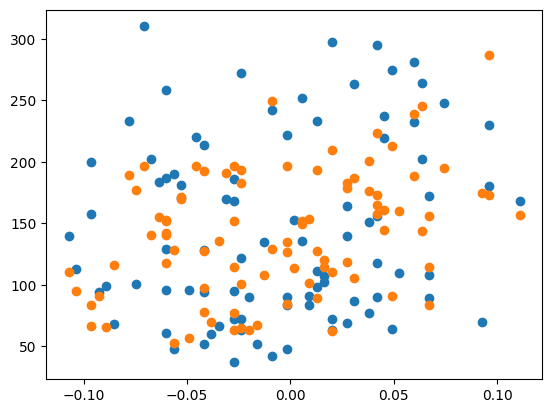

In [ ]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()